<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/220616%EA%B0%90%EC%9E%90_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
cd 

/root


In [2]:
cd ..

/


In [3]:
cd /content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


numpay, tensorflow , keras 파일 import

In [4]:
import numpy as np  
import datetime
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

머신러닝 설정

In [5]:
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL

def my_model():
  vgg19_model = VGG19(weights='imagenet',include_top=False,input_shape=INPUT_SIZE)
  vgg19_model.trainable = False
  flatten =Flatten()(vgg19_model.layers[-1].output)
  fc1 = Dense(units=4096, activation ='relu')(flatten)
  dropout = Dropout(0.2)(fc1)
  fc2 = Dense(units=1024,activation='relu')(dropout)
  output = Dense(2, activation='softmax')(fc2)
  model = Model(inputs = vgg19_model.input, outputs=output)
  model.summary()
  return model

In [6]:
model = my_model()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                              

In [4]:
cd 

/root


In [5]:
cd ..

/


In [6]:
cd /content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


학습전 1차 테스트

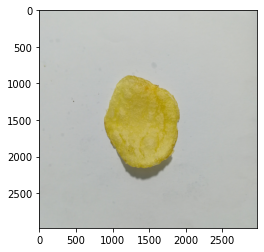

In [7]:
img = tf.io.read_file("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [8]:
CLASSES = ['Defective','Non-Defective']

tensor = tf.image.resize(tensor, [255, 255])
tensor = tensor / 255.0
input_tensor = tf.expand_dims(tensor, axis=0)

logit = model(input_tensor)
pred = tf.math.argmax(logit, axis=1, output_type=tf.dtypes.int64)

print(CLASSES[pred[0]])

Non-Defective


학습전 2차 테스트

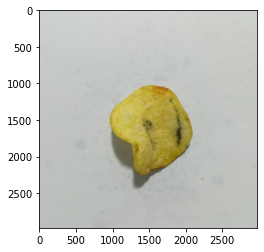

In [9]:
img = tf.io.read_file("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004710.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [10]:
CLASSES = ['Defective','Non-Defective']

tensor = tf.image.resize(tensor, [255, 255])
tensor = tensor / 255.0
input_tensor = tf.expand_dims(tensor, axis=0)

logit = model(input_tensor)
pred = tf.math.argmax(logit, axis=1, output_type=tf.dtypes.int64)

print(CLASSES[pred[0]])

Non-Defective


머신러닝 학습전 train, test 데이터 경로설정

In [7]:
# -- Global Variables -- 
TRAIN_PATH = 'Pepsico RnD Potato Lab Dataset/Train'
TEST_PATH = 'Pepsico RnD Potato Lab Dataset/Test'
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL
EPOCHS = 2
CLASSES = ['Defective','Non-Defective']

In [8]:
# -- Data Normalization --
data_generator = ImageDataGenerator(samplewise_center=True, #making sure that each image has a mean of 0
                                    samplewise_std_normalization=True, #and standard deviation 1
                                    horizontal_flip=True, #Randomly flip inputs horizontally
                                    validation_split=0.3,
                                    )

In [9]:
# -- Data iterators -- 
train_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                target_size=TARGET_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                color_mode=COLOR_MODE,
                                                subset='training',
                                                shuffle=True)         
    
validation_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                     target_size=TARGET_SIZE,
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical',
                                                     color_mode=COLOR_MODE,
                                                     subset='validation',
                                                     shuffle=True)             

test_data = data_generator.flow_from_directory(directory=TEST_PATH,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               color_mode=COLOR_MODE,
                                               shuffle=True)

Found 539 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

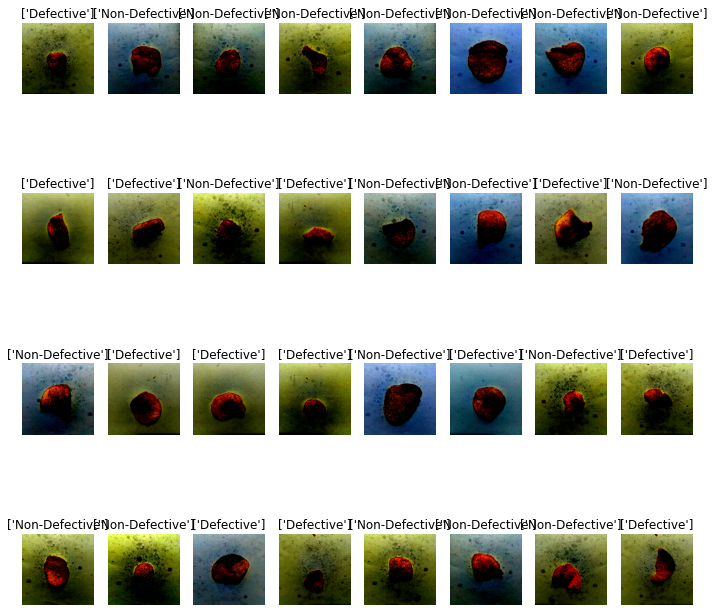

In [10]:
# -- plot random batch -- 
images, labels = train_data.next()
classes = np.asarray(CLASSES)

_, axs = plt.subplots(4, 8, figsize=(12,12))
axs = axs.flatten()
for img, label, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.axis('off')
    label = label.astype(int)
    ax.set_title(classes[label == 1])
plt.show()

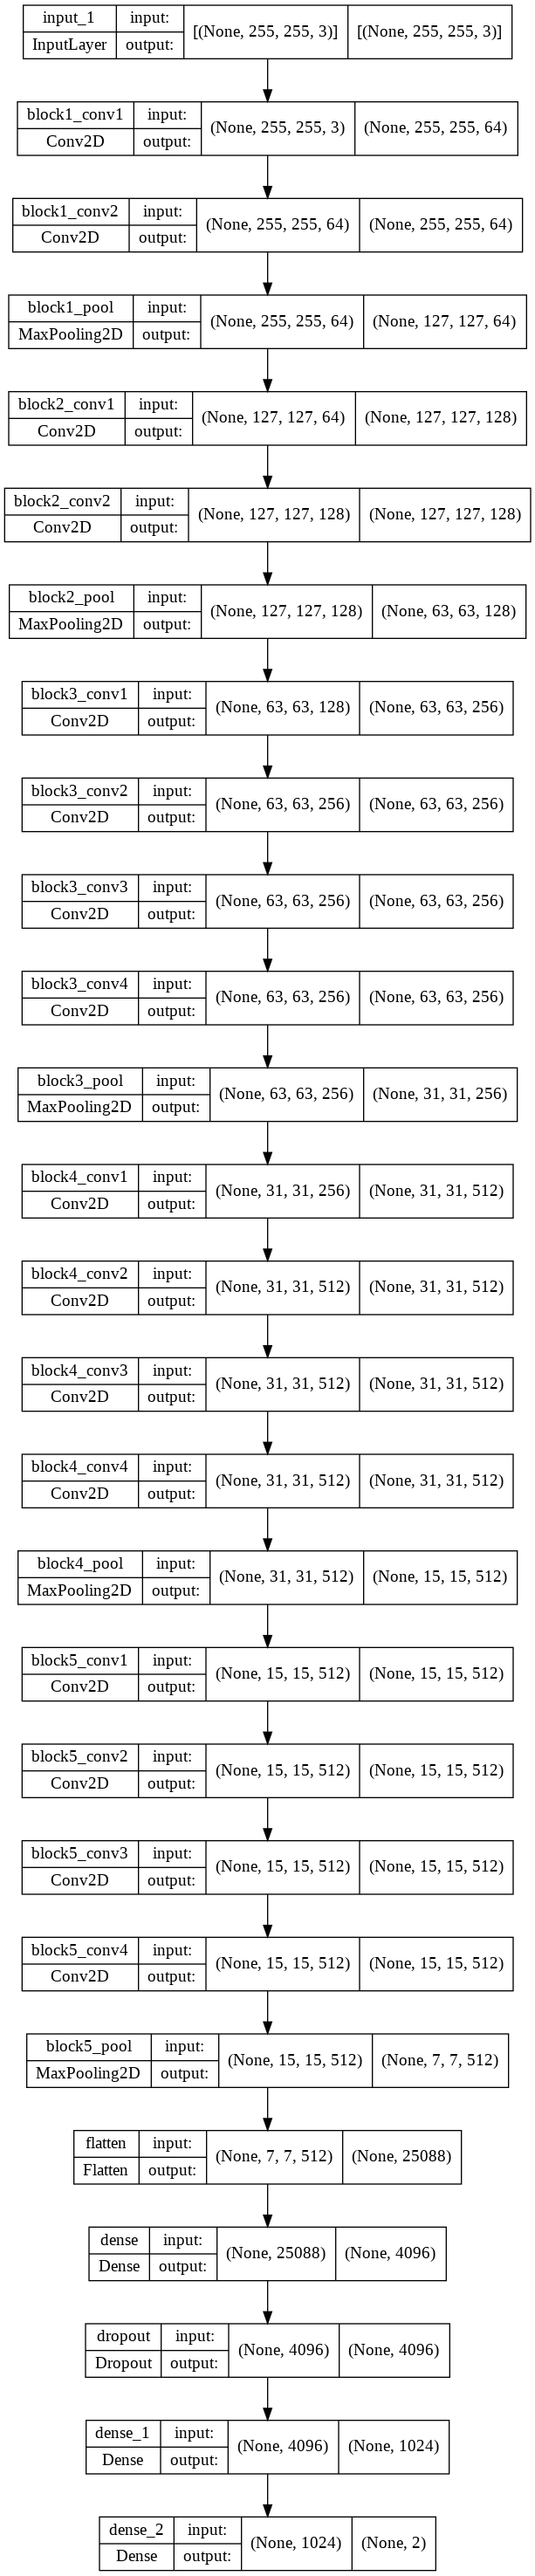

In [11]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='T', expand_nested=False, dpi=96
)

머신러닝 학습데이터 h5파일 로딩

In [16]:
model = tf.keras.models.load_model('my_model-p4.h5')

In [12]:
model = tf.keras.models.load_model('my_model-p4-8.h5')

머신러닝 학습전 테스트

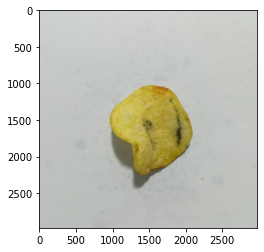

In [17]:
img = tf.io.read_file("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004710.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [18]:
CLASSES = ['Defective','Non-Defective']

tensor = tf.image.resize(tensor, [255, 255])
tensor = tensor / 255.0
input_tensor = tf.expand_dims(tensor, axis=0)

logit = model(input_tensor)
pred = tf.math.argmax(logit, axis=1, output_type=tf.dtypes.int64)

print(CLASSES[pred[0]])

Defective


학습 epoch  2회

In [19]:
# -- Train model --
history = model.fit(x=train_data, 
                        epochs=EPOCHS, 
                        steps_per_epoch=len(train_data), 
                        verbose=1, 
                        validation_data=validation_data, 
                        validation_steps=1)

Epoch 1/2
17/17 [==============================] - 164s 9s/step - loss: 0.0125 - accuracy: 0.9944 - val_loss: 0.0510 - val_accuracy: 0.9688
Epoch 2/2
17/17 [==============================] - 93s 6s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1044 - val_accuracy: 0.9375


In [20]:
# -- Save model -- 
model.save('my_model-p4-6.h5')

학습 epochs 에 따른 accuracy loss 현황 그래프

In [21]:
def learning_curves(history):
    '''plot learning curves'''
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss - Cross Entropy')
    plt.xlabel('epoch')
    plt.ylim([0,1.6])
    plt.title('Training and Validation Loss')
    
    plt.show()

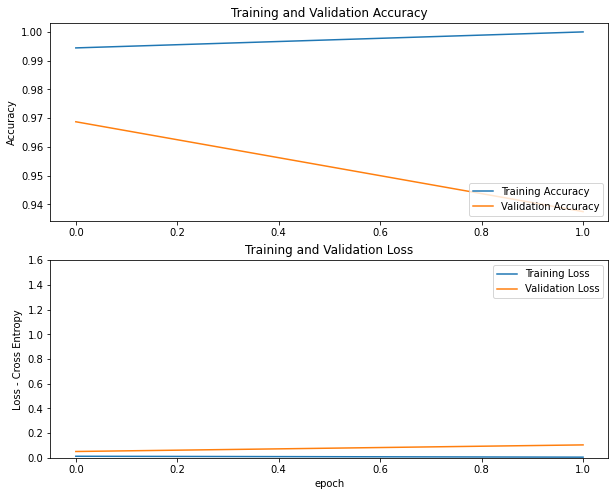

In [22]:
# -- Plot learning curves -- 
learning_curves(history)

김승택님 판별식

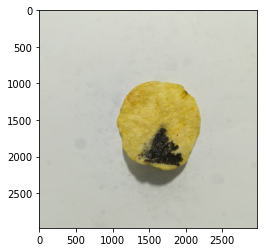

In [23]:
img = tf.io.read_file("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004811.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [24]:
CLASSES = ['Defective','Non-Defective']

tensor = tf.image.resize(tensor, [255, 255])
tensor = tensor / 255.0
input_tensor = tf.expand_dims(tensor, axis=0)

logit = model(input_tensor)
pred = tf.math.argmax(logit, axis=1, output_type=tf.dtypes.int64)

print(CLASSES[pred[0]])

Non-Defective


kaggle 예제 판별식

1차테스트

In [13]:
def defective_or_not(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    model = tf.keras.models.load_model('my_model-p4-6.h5')
    output = model.predict(img)
    print(classes[output[0]==1])
    # print(classes)
    # print(output)

In [14]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004811.jpg")

['Defective']


In [22]:
def defective_or_not(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    model = tf.keras.models.load_model('my_model-p4-8.h5')
    output = model.predict(img)
    print(classes[output[0]==1])
    print(classes)
    print(output)

In [23]:
print(classes)

['Defective' 'Non-Defective']


In [24]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004811.jpg")

['Defective']
['Defective' 'Non-Defective']
[[1. 0.]]


In [25]:
defective_or_not("IMG_20210318_232548.jpg")

[]
['Defective' 'Non-Defective']
[[9.9997389e-01 2.6111014e-05]]


In [36]:
def defective_or_not(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    model = tf.keras.models.load_model('my_model-p4-8.h5')
    output = model.predict(img)
    # print(classes[output[0]==argmax])
    print(classes[output[0]==1])
    print(classes)
    print(output)
    pred = model.predict(img)
    print(pred)

In [37]:
defective_or_not("IMG_20210318_232548.jpg")

NameError: ignored

In [34]:
defective_or_not("IMG_20210318_232548-defect.jpg")

['Defective']
['Defective' 'Non-Defective']
[[1. 0.]]
[[1. 0.]]


In [35]:
defective_or_not("IMG_20210318_232548-2.jpg")

['Defective']
['Defective' 'Non-Defective']
[[1.0000000e+00 3.6939443e-21]]
[[1.0000000e+00 3.6939443e-21]]


In [21]:
print(pred)

NameError: ignored

In [20]:
pred

NameError: ignored

In [19]:
print(output)

NameError: ignored

In [18]:
print(classes[output[0]==1])

NameError: ignored

In [26]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004811.jpg")

['Defective']


2차 테스트

In [36]:
def defective_or_not(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    model = tf.keras.models.load_model('my_model-p4-6.h5')
    output = model.predict(img)
    print(classes[output[0]==1])

In [28]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004811.jpg")

['Defective']


In [29]:
defective_or_not("IMG_20210318_232548-defect.jpg")

['Defective']


In [31]:
cd 

/root


In [32]:
cd /content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


In [33]:
defective_or_not("IMG_20210318_232548.jpg")

[]


In [34]:
defective_or_not("IMG_20210318_232548-defect.jpg")

['Defective']


In [35]:
defective_or_not("IMG_20210318_232548.jpg")

[]


In [37]:
defective_or_not("IMG_20210318_232548.jpg")

[]


In [38]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004811.jpg")

['Defective']


In [39]:
# Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg

In [40]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg")

['Non-Defective']


In [41]:
defective_or_not("IMG_20210318_232548.jpg")

[]


In [42]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_232548.jpg")

[]


In [43]:
# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_232548.jpg

In [56]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_232548.jpg")

[]


In [45]:
cd 

/root


In [46]:
cd /content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


In [48]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg")

['Non-Defective']


In [49]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_232548.jpg")

[]


In [50]:
# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_232542.jpg
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_232542.jpg")

[]


In [51]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_232507.jpg")

[]


In [52]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg")

['Non-Defective']


In [53]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231142.jpg")

['Non-Defective']


In [54]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231337.jpg")

[]


In [55]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231809.jpg")

[]


3차 학습

In [57]:
model = my_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0   

In [59]:
model = tf.keras.models.load_model('my_model-p4-6.h5')

In [60]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231809.jpg")

[]


In [61]:
# -- Train model --
history = model.fit(x=train_data, 
                        epochs=EPOCHS, 
                        steps_per_epoch=len(train_data), 
                        verbose=1, 
                        validation_data=validation_data, 
                        validation_steps=1)

Epoch 1/2
17/17 [==============================] - 84s 5s/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 2/2
17/17 [==============================] - 74s 4s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 1.0000


In [62]:
# -- Evaluate the model on the test data -- 
loss, accuracy = model.evaluate(x=test_data)
print("test loss: ", loss, ", test acc: " , 100*accuracy, "%")

6/6 [==============================] - 46s 8s/step - loss: 0.2267 - accuracy: 0.8854
test loss:  0.2267463654279709 , test acc:  88.54166865348816 %


In [63]:
# -- Save model -- 
model.save('my_model-p4-8.h5')

In [78]:
def defective_or_not(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    model = tf.keras.models.load_model('my_model-p4-8.h5')
    output = model.predict(img)
    print(classes[output[0]==1])

In [65]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231809.jpg")

[]


In [21]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Train/Non-Defective/IMG_20210318_232804.jpg")
# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Train/Non-Defective/IMG_20210318_232804.jpg

['Non-Defective']


In [83]:
cd 

/root


In [84]:
cd ..

/


In [85]:
cd /content/drive/MyDrive/deeplearning/

/content/drive/MyDrive/deeplearning


In [19]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231809.jpg")

[]


In [17]:
def defective_or_not(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    model = tf.keras.models.load_model('my_model-p4-8.h5')
    output = model.predict(img)
    print(classes[output[0]==1])

In [18]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231809.jpg")

[]


In [20]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg")

['Non-Defective']


In [22]:
defective_or_not("IMG_20210318_232548.jpg")

[]


In [23]:
defective_or_not("IMG_20210318_232548-defect.jpg")

['Defective']


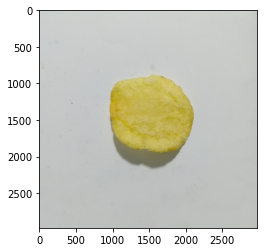

In [25]:
img = tf.io.read_file("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231809.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [26]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231809.jpg")

[]


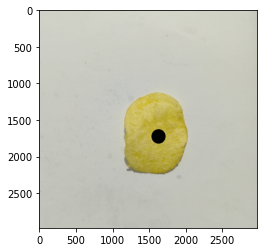

In [27]:
img = tf.io.read_file("IMG_20210318_232548-defect.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [28]:
defective_or_not("IMG_20210318_232548-defect.jpg")

['Defective']


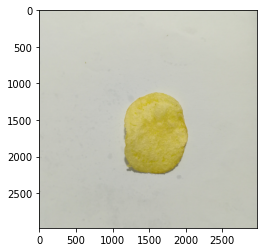

In [29]:
img = tf.io.read_file("IMG_20210318_232548.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [30]:
defective_or_not("IMG_20210318_232548.jpg")

[]


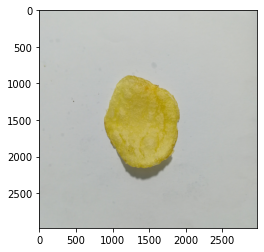

In [31]:
img = tf.io.read_file("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# /content/drive/MyDrive/deeplearning/Pepsico RnD Potato Lab Dataset/Test/Not Defective

In [32]:
defective_or_not("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg")

['Non-Defective']
